In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv("Mental Health Questionnaire 2.0.csv")

In [ ]:
df

,Timestamp,Email address,Name,Gender,Are you above 30 years of age?,Employment Status,City,How are you feeling today?,eating and sleeping,(If sad)have you been in the same mental state for the past few days?,...,"Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?",Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",Has the COVID-19 pandemic affected your mental well being?,How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction,Prediction_status
0,09-12-2021 23:54,riyaaditi2@gmail.com,Aditi Harsh,Female,No,Student,Tier 3 (Other cities/towns),Fine,Yes,No,...,No,No,NaN,NaN,NaN,NaN,NaN,NaN,36,Yes
1,10-12-2021 08:40,imcrazyashutosh@gmail.com,Ashutosh Kumar,Male,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Fine,No,Yes,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,33,No
2,10-12-2021 21:48,atharv23srivastava@gmail.com,Atharv srivastava,Male,No,Student,"Tier 1 (Delhi, Mumbai, Bangalore, Chennai, Kol...",Fine,No,Maybe,...,Maybe,Maybe,More than 10 hours,1.0,Yes,Sometimes,2.0,NaN,34,No
3,10-12-2021 21:50,ritulricha22@gmail.com,Rimi,Female,No,Student,Tier 3 (Other cities/towns),Fine,No,Maybe,...,Yes,Yes,2-5 hours,1.0,Yes,Often,4.0,NaN,35,Yes
4,10-12-2021 21:55,nisha18054@gmail.com,Jaya singh,Female,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,...,No,No,5-10 hours,1.0,Not sure,Sometimes,4.0,NaN,33,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,15-12-2021 13:18,shwetank1921@gmail.com,Kumar shwetank,Male,Yes,Unemployed,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,...,Yes,Yes,2-5 hours,4.0,Yes,Sometimes,4.0,4.0,43,Yes
154,15-12-2021 15:17,shukla.anu23@gmail.com,Anurag Shukla,Male,Yes,Employed,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,...,No,No,2-5 hours,1.0,Yes,Often,1.0,5.0,34,No
155,15-12-2021 21:52,anshikagrawal1@gmail.com,Anshika,Prefer not to say,No,Self-Employed,Tier 3 (Other cities/towns),Depressed,No,Yes,...,Yes,No,More than 10 hours,5.0,Yes,Very often,5.0,5.0,45,Yes
156,16-12-2021 09:36,mrubaiskhanji1998@gmail.com,Mohd. Ubais Khan,Male,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Fine,Maybe,No,...,Maybe,Maybe,2-5 hours,5.0,Not sure,Never,5.0,5.0,40,Yes


In [ ]:
# for i in range(1,29):
#   df.columns = df.columns.str.replace(' ','_')

In [ ]:
df.describe()

,How confident you have been feeling in your capabilities recently.,"If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction
count,158.000000,150.000000,155.000000,116.000000,158.000000
mean,3.417722,2.206667,2.929032,3.956897,34.879747
std,1.216737,1.401326,1.339266,1.189755,4.211536
min,1.000000,1.000000,1.000000,1.000000,26.000000
25%,3.000000,1.000000,2.000000,3.000000,32.000000
50%,3.500000,1.500000,3.000000,4.000000,35.000000
75%,4.000000,3.000000,4.000000,5.000000,38.000000
max,5.000000,5.000000,5.000000,5.000000,45.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 32 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             158 non-null    object 
 1   Email address                                                                                                         158 non-null    object 
 2   Name                                                                                                                  158 non-null    object 
 3   Gender                                                                                                                158 non-null    object 
 4   Are you 

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(158, 32)

In [ ]:
#sns.pairplot(df)

In [ ]:
df.isnull().sum()

Timestamp                                                                                                                0
Email address                                                                                                            0
Name                                                                                                                     0
Gender                                                                                                                   0
Are you above 30 years of age?                                                                                           0
Employment Status                                                                                                        0
City                                                                                                                     0
How are you feeling today?                                                                                               0
eating and sleep

In [ ]:
df.drop(['How comfortable are you in talking about your mental health?'], axis=1,inplace=True)



In [ ]:
df.drop(['Timestamp'], axis=1,inplace=True)

In [ ]:
df.drop(['Email address'], axis=1,inplace=True)
	

In [ ]:
df.drop(['Name'], axis=1,inplace=True)

In [ ]:
mapping = {'Yes':1, 'No':0}
df['Prediction_status'] = df['Prediction_status'].replace(mapping)

In [ ]:
df.head()

,Gender,Are you above 30 years of age?,Employment Status,City,How are you feeling today?,eating and sleeping,(If sad)have you been in the same mental state for the past few days?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,Has there been a sudden and huge change in your life?,...,Have you taken any therapy or medication in the near past for mental health?,"Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?",Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",Has the COVID-19 pandemic affected your mental well being?,How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,Prediction,Prediction_status
0,Female,No,Student,Tier 3 (Other cities/towns),Fine,Yes,No,For some time,Evening,No,...,No,No,No,NaN,NaN,NaN,NaN,NaN,36,1
1,Male,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Fine,No,Yes,For some time,Morning,Yes,...,No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,33,0
2,Male,No,Student,"Tier 1 (Delhi, Mumbai, Bangalore, Chennai, Kol...",Fine,No,Maybe,Significant time,Evening,No,...,No,Maybe,Maybe,More than 10 hours,1.0,Yes,Sometimes,2.0,34,0
3,Female,No,Student,Tier 3 (Other cities/towns),Fine,No,Maybe,Significant time,Evening,Not sure,...,No,Yes,Yes,2-5 hours,1.0,Yes,Often,4.0,35,1
4,Female,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,Not sad,Afternoon,Yes,...,No,No,No,5-10 hours,1.0,Not sure,Sometimes,4.0,33,0


In [ ]:
x=df.drop(['Prediction_status'], axis=1)
y=df['Prediction_status']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3) 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 28 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Gender                                                                                                                158 non-null    object 
 1   Are you above 30 years of age?                                                                                        158 non-null    object 
 2   Employment Status                                                                                                     158 non-null    object 
 3   City                                                                                                                  158 non-null    object 
 4   How are 

In [ ]:
df.columns

Index(['Gender', 'Are you above 30 years of age?', 'Employment Status', 'City',
       'How are you feeling today?', 'eating and sleeping',
       '(If sad)have you been in the same mental state for the past few days?',
       'Is your sadness momentarily or has it been constant for a long time?',
       'At what time of the day are you extremely low?',
       'Has there been a sudden and huge change in your life?',
       'Your stress is related to which of the following areas?',
       'How frequently have you had little pleasure or interest in the activities you usually enjoy?',
       'How confident you have been feeling in your capabilities recently.',
       'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.',
       'How frequently have you been doing things that mean something to you or your life?',
       'If you have a mental health condition, do you feel that it interferes with your work?',
       'How easy is it for you to take med

In [ ]:
one_hot = pd.get_dummies(df, columns =["Gender", 'Are you above 30 years of age?', 'Employment Status', 'City',
       'How are you feeling today?', 'eating and sleeping',
       '(If sad)have you been in the same mental state for the past few days?',
       'Is your sadness momentarily or has it been constant for a long time?',
       'At what time of the day are you extremely low?',
       'Has there been a sudden and huge change in your life?',
       'Your stress is related to which of the following areas?',
       'How frequently have you had little pleasure or interest in the activities you usually enjoy?','Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.',
       'How frequently have you been doing things that mean something to you or your life?',
       'If you have a mental health condition, do you feel that it interferes with your work?',
       'How easy is it for you to take medical leave for a mental health condition?',
       'How often do you make use of substance abuse(e.g. smoking, alcohol)?',
       'Have you taken any therapy or medication in the near past for mental health?',
       'Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?',
       'Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?',
       'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?','Has the COVID-19 pandemic affected your mental well being?',
       'How often do you get offended or angry or start crying ?'])

In [ ]:
data=one_hot.copy()

In [ ]:
data.columns

Index(['How confident you have been feeling in your capabilities recently.',
       'If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?',
       'How likely do you feel yourself vulnerable or lonely?', 'Prediction',
       'Prediction_status', 'Gender_Female', 'Gender_Male',
       'Gender_Prefer not to say', 'Are you above 30 years of age?_No',
       'Are you above 30 years of age?_Yes', 'Employment Status_Employed',
       'Employment Status_Self-Employed', 'Employment Status_Student',
       'Employment Status_Unemployed',
       'City_Tier 1 (Delhi, Mumbai, Bangalore, Chennai, Kolkata)',
       'City_Tier 2 (Capital cities Eg. Lucknow )',
       'City_Tier 3 (Other cities/towns)',
       'How are you feeling today?_Depressed',
       'How are you feeling today?_Fine', 'How are you feeling today?_Good',
       'How are you feeling today?_Sad', 'eating and sleeping_Maybe',
       'eating and sleeping_No', 'eating and 

In [ ]:
#changing NAN values by imputer
imp = SimpleImputer(missing_values=np.NAN, strategy='mean')

In [ ]:
imp=imp.fit(one_hot)

In [ ]:
one_hot = imp.transform(one_hot)

In [ ]:
one_hot

array([[4.        , 2.20666667, 2.92903226, ..., 0.        , 0.        ,
        0.        ],
       [2.        , 2.20666667, 2.92903226, ..., 0.        , 0.        ,
        0.        ],
       [2.        , 1.        , 2.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 5.        , 5.        , ..., 0.        , 0.        ,
        1.        ],
       [5.        , 5.        , 5.        , ..., 0.        , 0.        ,
        0.        ],
       [4.        , 1.        , 3.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
#changing numpy array into data frame
data=pd.DataFrame(one_hot,columns = ['How confident you have been feeling in your capabilities recently.',
       'If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?',
       'How likely do you feel yourself vulnerable or lonely?', 'Prediction',
       'Prediction_status', 'Gender_Female', 'Gender_Male',
       'Gender_Prefer not to say', 'Are you above 30 years of age?_No',
       'Are you above 30 years of age?_Yes', 'Employment Status_Employed',
       'Employment Status_Self-Employed', 'Employment Status_Student',
       'Employment Status_Unemployed',
       'City_Tier 1 (Delhi, Mumbai, Bangalore, Chennai, Kolkata)',
       'City_Tier 2 (Capital cities Eg. Lucknow )',
       'City_Tier 3 (Other cities/towns)',
       'How are you feeling today?_Depressed',
       'How are you feeling today?_Fine', 'How are you feeling today?_Good',
       'How are you feeling today?_Sad', 'eating and sleeping_Maybe',
       'eating and sleeping_No', 'eating and sleeping_Yes',
       '(If sad)have you been in the same mental state for the past few days?_Maybe',
       '(If sad)have you been in the same mental state for the past few days?_No',
       '(If sad)have you been in the same mental state for the past few days?_Yes',
       'Is your sadness momentarily or has it been constant for a long time?_For some time',
       'Is your sadness momentarily or has it been constant for a long time?_Long time',
       'Is your sadness momentarily or has it been constant for a long time?_Not sad',
       'Is your sadness momentarily or has it been constant for a long time?_Significant time',
       'At what time of the day are you extremely low?_Afternoon',
       'At what time of the day are you extremely low?_Evening',
       'At what time of the day are you extremely low?_Morning',
       'Has there been a sudden and huge change in your life?_No',
       'Has there been a sudden and huge change in your life?_Not sure',
       'Has there been a sudden and huge change in your life?_Yes',
       'Your stress is related to which of the following areas?_Financial',
       'Your stress is related to which of the following areas?_Financial, Personal',
       'Your stress is related to which of the following areas?_Home',
       'Your stress is related to which of the following areas?_Home, Financial',
       'Your stress is related to which of the following areas?_Home, Financial, Personal',
       'Your stress is related to which of the following areas?_Home, Personal',
       'Your stress is related to which of the following areas?_Home, Work',
       'Your stress is related to which of the following areas?_Home, Work, Financial',
       'Your stress is related to which of the following areas?_Home, Work, Financial, Personal',
       'Your stress is related to which of the following areas?_Home, Work, Financial, Personal, None',
       'Your stress is related to which of the following areas?_Home, Work, Personal',
       'Your stress is related to which of the following areas?_Home, Work, Personal, None',
       'Your stress is related to which of the following areas?_None',
       'Your stress is related to which of the following areas?_Personal',
       'Your stress is related to which of the following areas?_Personal, None',
       'Your stress is related to which of the following areas?_Work',
       'Your stress is related to which of the following areas?_Work, Financial',
       'Your stress is related to which of the following areas?_Work, Financial, Personal',
       'Your stress is related to which of the following areas?_Work, Personal',
       'How frequently have you had little pleasure or interest in the activities you usually enjoy?_Never',
       'How frequently have you had little pleasure or interest in the activities you usually enjoy?_Often',
       'How frequently have you had little pleasure or interest in the activities you usually enjoy?_Sometimes',
       'How frequently have you had little pleasure or interest in the activities you usually enjoy?_Very Often',
       'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise._Highly supportive',
       'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise._Little bit',
       'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise._Not at all',
       'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise._Satisfactory',
       'How frequently have you been doing things that mean something to you or your life?_Never',
       'How frequently have you been doing things that mean something to you or your life?_Often',
       'How frequently have you been doing things that mean something to you or your life?_Sometimes',
       'How frequently have you been doing things that mean something to you or your life?_Very Often',
       'If you have a mental health condition, do you feel that it interferes with your work?_Maybe',
       'If you have a mental health condition, do you feel that it interferes with your work?_No',
       'If you have a mental health condition, do you feel that it interferes with your work?_Yes',
       'How easy is it for you to take medical leave for a mental health condition?_Difficult',
       'How easy is it for you to take medical leave for a mental health condition?_Easy',
       'How easy is it for you to take medical leave for a mental health condition?_Not so easy',
       'How easy is it for you to take medical leave for a mental health condition?_Very easy',
       'How often do you make use of substance abuse(e.g. smoking, alcohol)?_Never',
       'How often do you make use of substance abuse(e.g. smoking, alcohol)?_Often',
       'How often do you make use of substance abuse(e.g. smoking, alcohol)?_Sometimes',
       'How often do you make use of substance abuse(e.g. smoking, alcohol)?_Very Often',
       'Have you taken any therapy or medication in the near past for mental health?_Maybe',
       'Have you taken any therapy or medication in the near past for mental health?_No',
       'Have you taken any therapy or medication in the near past for mental health?_Yes',
       'Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?_Maybe',
       'Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?_No',
       'Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?_Yes',
       'Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?_Maybe',
       'Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?_No',
       'Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?_Yes',
       'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?_1-2 hours',
       'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?_2-5 hours',
       'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?_5-10 hours',
       'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?_More than 10 hours',
       'Has the COVID-19 pandemic affected your mental well being?_No',
       'Has the COVID-19 pandemic affected your mental well being?_Not sure',
       'Has the COVID-19 pandemic affected your mental well being?_Yes',
       'How often do you get offended or angry or start crying ?_Never',
       'How often do you get offended or angry or start crying ?_Often',
       'How often do you get offended or angry or start crying ?_Sometimes',
       'How often do you get offended or angry or start crying ?_Very often'])

In [ ]:

'''data.columns = data.columns.str.replace(' ','_')
data.columns = data.columns.str.replace('?','')
data.columns = data.columns.str.replace('(','')
data.columns = data.columns.str.replace(')','')'''

"data.columns = data.columns.str.replace(' ','_')\ndata.columns = data.columns.str.replace('?','')\ndata.columns = data.columns.str.replace('(','')\ndata.columns = data.columns.str.replace(')','')"

In [ ]:
import re
temp = data.columns
temp1 = []
for i in temp:
    temp1.append(re.sub('[^a-zA-Z0-9 \n\.]', ' ', i))


In [ ]:
temp1

['How confident you have been feeling in your capabilities recently.',
 'If sad  how likely are you to take an appointment with a psychologist or a counsellor for your current mental state ',
 'How likely do you feel yourself vulnerable or lonely ',
 'Prediction',
 'Prediction status',
 'Gender Female',
 'Gender Male',
 'Gender Prefer not to say',
 'Are you above 30 years of age  No',
 'Are you above 30 years of age  Yes',
 'Employment Status Employed',
 'Employment Status Self Employed',
 'Employment Status Student',
 'Employment Status Unemployed',
 'City Tier 1  Delhi  Mumbai  Bangalore  Chennai  Kolkata ',
 'City Tier 2  Capital cities Eg. Lucknow  ',
 'City Tier 3  Other cities towns ',
 'How are you feeling today  Depressed',
 'How are you feeling today  Fine',
 'How are you feeling today  Good',
 'How are you feeling today  Sad',
 'eating and sleeping Maybe',
 'eating and sleeping No',
 'eating and sleeping Yes',
 ' If sad have you been in the same mental state for the past few 

In [ ]:
data.columns = temp1

In [ ]:
data.columns

Index(['How confident you have been feeling in your capabilities recently.',
       'If sad  how likely are you to take an appointment with a psychologist or a counsellor for your current mental state ',
       'How likely do you feel yourself vulnerable or lonely ', 'Prediction',
       'Prediction status', 'Gender Female', 'Gender Male',
       'Gender Prefer not to say', 'Are you above 30 years of age  No',
       'Are you above 30 years of age  Yes', 'Employment Status Employed',
       'Employment Status Self Employed', 'Employment Status Student',
       'Employment Status Unemployed',
       'City Tier 1  Delhi  Mumbai  Bangalore  Chennai  Kolkata ',
       'City Tier 2  Capital cities Eg. Lucknow  ',
       'City Tier 3  Other cities towns ',
       'How are you feeling today  Depressed',
       'How are you feeling today  Fine', 'How are you feeling today  Good',
       'How are you feeling today  Sad', 'eating and sleeping Maybe',
       'eating and sleeping No', 'eating and 

In [ ]:
data.columns = data.columns.str.replace(' ','_')

In [ ]:
data

,How_confident_you_have_been_feeling_in_your_capabilities_recently.,If_sad__how_likely_are_you_to_take_an_appointment_with_a_psychologist_or_a_counsellor_for_your_current_mental_state_,How_likely_do_you_feel_yourself_vulnerable_or_lonely_,Prediction,Prediction_status,Gender_Female,Gender_Male,Gender_Prefer_not_to_say,Are_you_above_30_years_of_age__No,Are_you_above_30_years_of_age__Yes,...,How_many_hours_do_you_spend_per_day_on_watching_mobile_phone__laptop__computer__television__etc.__2_5_hours,How_many_hours_do_you_spend_per_day_on_watching_mobile_phone__laptop__computer__television__etc.__5_10_hours,How_many_hours_do_you_spend_per_day_on_watching_mobile_phone__laptop__computer__television__etc.__More_than_10_hours,Has_the_COVID_19_pandemic_affected_your_mental_well_being__No,Has_the_COVID_19_pandemic_affected_your_mental_well_being__Not_sure,Has_the_COVID_19_pandemic_affected_your_mental_well_being__Yes,How_often_do_you_get_offended_or_angry_or_start_crying___Never,How_often_do_you_get_offended_or_angry_or_start_crying___Often,How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes,How_often_do_you_get_offended_or_angry_or_start_crying___Very_often
0,4.0,2.206667,2.929032,36.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2.206667,2.929032,33.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.000000,2.000000,34.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2.0,1.000000,4.000000,35.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,3.0,1.000000,4.000000,33.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,5.0,4.000000,4.000000,43.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
154,5.0,1.000000,1.000000,34.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
155,1.0,5.000000,5.000000,45.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
156,5.0,5.000000,5.000000,40.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
x=data.drop(['Prediction_status'], axis=1)
y=data['Prediction_status']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3) 

In [ ]:

for num in range(2,20):
    dtr = DecisionTreeRegressor(max_features= 'log2',
     max_leaf_nodes= num,
     min_samples_leaf= 10,
     min_samples_split= 5,
     splitter='best',random_state = 23
       )
    dtr.fit(x_train,y_train)
    pred = dtr.predict(x_test)
    print('For max_leaf_nodes = %s' % num)
    print('Mean Squared Error',mean_squared_error(pred,y_test))
    print('Mean Absolute Error',mean_absolute_error(pred,y_test))
    print('Root Mean Squared Error',mean_squared_error(pred,y_test)**0.5)
    print('r2_score',r2_score(y_test,pred))
    print('Clusters = ',np.unique(pred))
    print()

For max_leaf_nodes = 2
Mean Squared Error 0.255180323196565
Mean Absolute Error 0.4717067279368446
Root Mean Squared Error 0.5051537619344876
r2_score -0.049884758294438836
Clusters =  [0.42028986 0.7804878 ]

For max_leaf_nodes = 3
Mean Squared Error 0.2391647802434039
Mean Absolute Error 0.42943619653587844
Root Mean Squared Error 0.48904476302625294
r2_score 0.016007761284281052
Clusters =  [0.13043478 0.56521739 0.7804878 ]

For max_leaf_nodes = 4
Mean Squared Error 0.2400192487317319
Mean Absolute Error 0.42850451951724483
Root Mean Squared Error 0.48991759381729894
r2_score 0.012492233789445861
Clusters =  [0.13043478 0.54285714 0.63636364 0.7804878 ]

For max_leaf_nodes = 5
Mean Squared Error 0.17527435077254824
Mean Absolute Error 0.30171880523153055
Root Mean Squared Error 0.41865779674162074
r2_score 0.27887124253580153
Clusters =  [0.         0.13043478 0.63636364 0.7804878  1.        ]

For max_leaf_nodes = 6
Mean Squared Error 0.17454636674552393
Mean Absolute Error 0.3011

In [ ]:
num = 5
dtr = DecisionTreeRegressor(max_features= 'log2',
     max_leaf_nodes= num,
     min_samples_leaf= 10,
     min_samples_split= 5,
     splitter='best')
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_features='log2', max_leaf_nodes=5,
                      min_samples_leaf=10, min_samples_split=5)

In [ ]:
print(dtr.predict(x_train))

[0.61904762 0.39130435 0.77419355 0.39130435 0.39130435 0.61904762
 0.61904762 0.2        0.77419355 0.2        0.61904762 0.61904762
 0.2        0.61904762 0.77419355 0.77419355 0.2        0.77419355
 0.77419355 0.77419355 0.39130435 0.2        0.39130435 0.39130435
 0.77419355 0.77419355 0.77419355 0.39130435 0.39130435 0.77419355
 0.77419355 0.39130435 0.77419355 0.77419355 0.39130435 0.77419355
 0.73333333 0.77419355 0.73333333 0.61904762 0.2        0.77419355
 0.77419355 0.77419355 0.73333333 0.2        0.39130435 0.61904762
 0.61904762 0.61904762 0.2        0.61904762 0.73333333 0.39130435
 0.39130435 0.61904762 0.61904762 0.73333333 0.73333333 0.2
 0.2        0.2        0.39130435 0.39130435 0.73333333 0.73333333
 0.73333333 0.39130435 0.39130435 0.2        0.2        0.77419355
 0.2        0.39130435 0.77419355 0.61904762 0.2        0.2
 0.61904762 0.77419355 0.39130435 0.77419355 0.73333333 0.77419355
 0.77419355 0.2        0.77419355 0.61904762 0.2        0.73333333
 0.2     

In [ ]:
feats = x_train.columns

In [ ]:
text_representation = tree.export_text(dtr)
print(text_representation)

|--- feature_70 <= 0.50
|   |--- feature_48 <= 0.50
|   |   |--- feature_21 <= 0.50
|   |   |   |--- feature_96 <= 0.50
|   |   |   |   |--- value: [0.62]
|   |   |   |--- feature_96 >  0.50
|   |   |   |   |--- value: [0.39]
|   |   |--- feature_21 >  0.50
|   |   |   |--- value: [0.73]
|   |--- feature_48 >  0.50
|   |   |--- value: [0.20]
|--- feature_70 >  0.50
|   |--- value: [0.77]



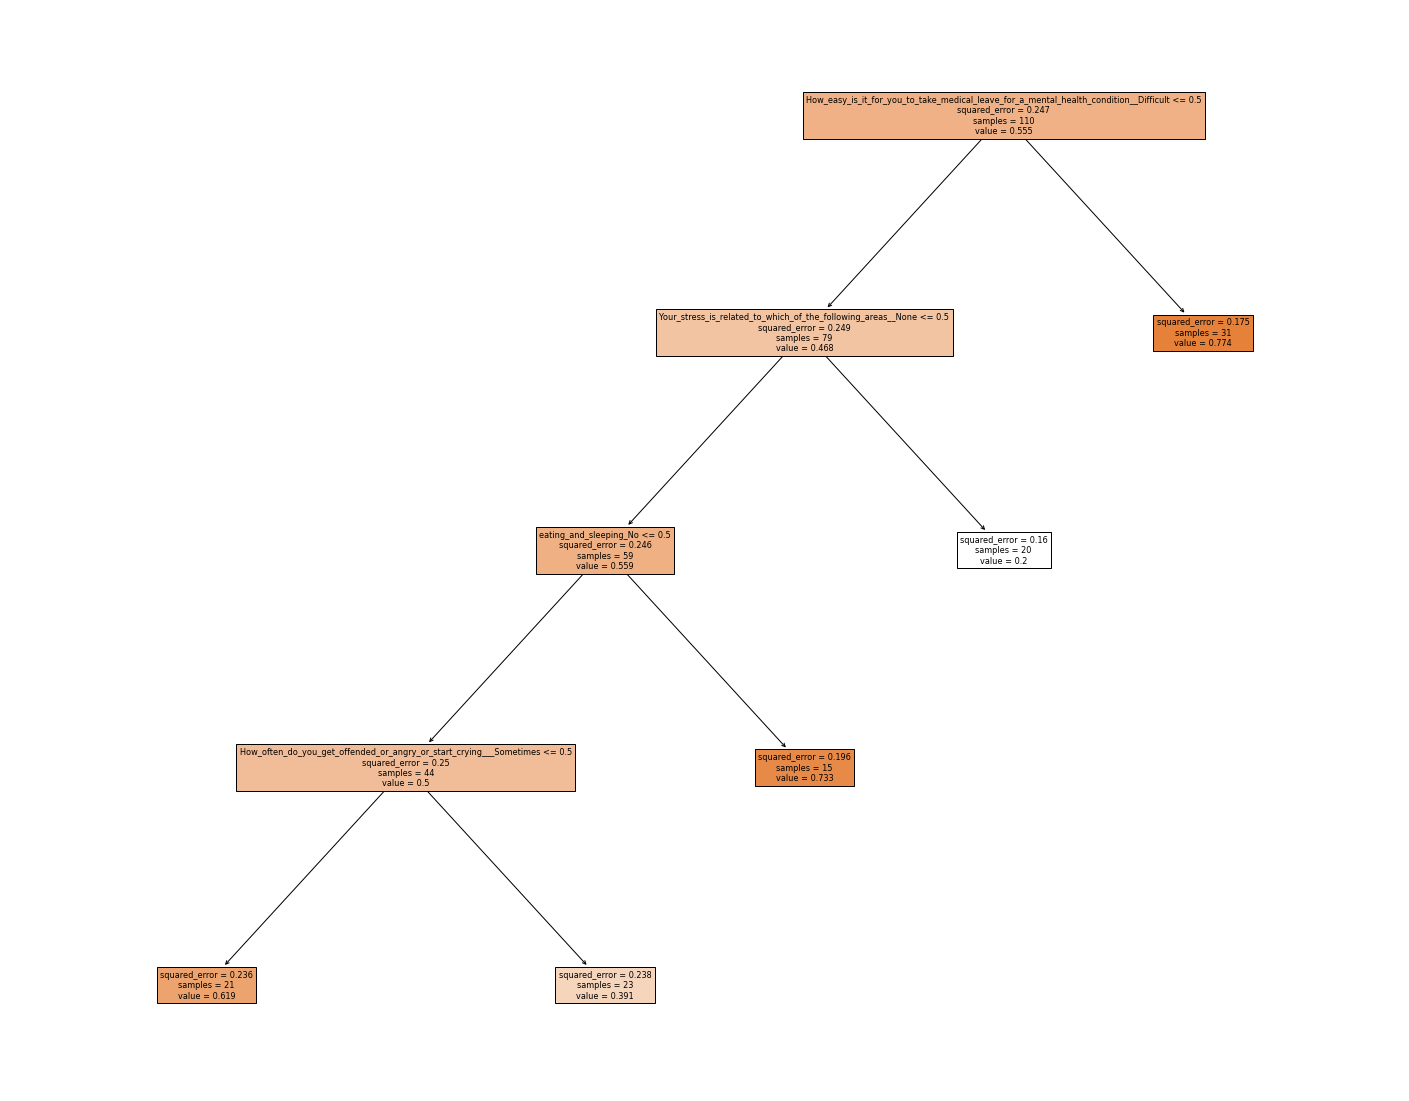

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr, 
                   feature_names=feats,  
                   
                   filled=True)

In [ ]:
# from sklearn.tree import _tree

# def tree_to_code(tree, feature_names):
#     tree_ = tree.tree_
#     feature_name = [
#         feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
#         for i in tree_.feature
#     ]
#     feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
#     print("def predict({}):".format(", ".join(feature_names)))

#     def recurse(node, depth):
#         indent = "    " * depth
#         if tree_.feature[node] != _tree.TREE_UNDEFINED:
#             name = feature_name[node]
#             threshold = tree_.threshold[node]
#             print("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
#             recurse(tree_.children_left[node], depth + 1)
#             print("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
#             recurse(tree_.children_right[node], depth + 1)
#         else:
#             print("{}return {}".format(indent, tree_.value[node]))

#     recurse(0, 1)

In [ ]:
from sklearn.tree import _tree


In [ ]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [ ]:
rules = get_rules(dtr, feats, None)
for r in rules:
    print(r)


if (How_easy_is_it_for_you_to_take_medical_leave_for_a_mental_health_condition__Difficult > 0.5) then response: 0.774 | based on 31 samples
if (How_easy_is_it_for_you_to_take_medical_leave_for_a_mental_health_condition__Difficult <= 0.5) and (Your_stress_is_related_to_which_of_the_following_areas__None <= 0.5) and (eating_and_sleeping_No <= 0.5) and (How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes > 0.5) then response: 0.391 | based on 23 samples
if (How_easy_is_it_for_you_to_take_medical_leave_for_a_mental_health_condition__Difficult <= 0.5) and (Your_stress_is_related_to_which_of_the_following_areas__None <= 0.5) and (eating_and_sleeping_No <= 0.5) and (How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes <= 0.5) then response: 0.619 | based on 21 samples
if (How_easy_is_it_for_you_to_take_medical_leave_for_a_mental_health_condition__Difficult <= 0.5) and (Your_stress_is_related_to_which_of_the_following_areas__None > 0.5) then response: 0.2 | based o

In [ ]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = ""
        for p in path[:-1]:
            if rule != "":
                rule += " & "
            rule += str(p.strip('()'))
        rules += [rule]
        
    return rules

In [ ]:
rules = get_rules(dtr, feats, None)
for r in rules:
    print(r)


How_easy_is_it_for_you_to_take_medical_leave_for_a_mental_health_condition__Difficult > 0.5
How_easy_is_it_for_you_to_take_medical_leave_for_a_mental_health_condition__Difficult <= 0.5 & Your_stress_is_related_to_which_of_the_following_areas__None <= 0.5 & eating_and_sleeping_No <= 0.5 & How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes > 0.5
How_easy_is_it_for_you_to_take_medical_leave_for_a_mental_health_condition__Difficult <= 0.5 & Your_stress_is_related_to_which_of_the_following_areas__None <= 0.5 & eating_and_sleeping_No <= 0.5 & How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes <= 0.5
How_easy_is_it_for_you_to_take_medical_leave_for_a_mental_health_condition__Difficult <= 0.5 & Your_stress_is_related_to_which_of_the_following_areas__None > 0.5
How_easy_is_it_for_you_to_take_medical_leave_for_a_mental_health_condition__Difficult <= 0.5 & Your_stress_is_related_to_which_of_the_following_areas__None <= 0.5 & eating_and_sleeping_No > 0.5


In [ ]:
clustering_df = x_train.copy()
clustering_df['LabelOfCluster'] = -1

In [ ]:
clustering_df

,How_confident_you_have_been_feeling_in_your_capabilities_recently.,If_sad__how_likely_are_you_to_take_an_appointment_with_a_psychologist_or_a_counsellor_for_your_current_mental_state_,How_likely_do_you_feel_yourself_vulnerable_or_lonely_,Prediction,Gender_Female,Gender_Male,Gender_Prefer_not_to_say,Are_you_above_30_years_of_age__No,Are_you_above_30_years_of_age__Yes,Employment_Status_Employed,...,How_many_hours_do_you_spend_per_day_on_watching_mobile_phone__laptop__computer__television__etc.__5_10_hours,How_many_hours_do_you_spend_per_day_on_watching_mobile_phone__laptop__computer__television__etc.__More_than_10_hours,Has_the_COVID_19_pandemic_affected_your_mental_well_being__No,Has_the_COVID_19_pandemic_affected_your_mental_well_being__Not_sure,Has_the_COVID_19_pandemic_affected_your_mental_well_being__Yes,How_often_do_you_get_offended_or_angry_or_start_crying___Never,How_often_do_you_get_offended_or_angry_or_start_crying___Often,How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes,How_often_do_you_get_offended_or_angry_or_start_crying___Very_often,LabelOfCluster
61,2.0,4.000000,4.0,33.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1
76,4.0,4.000000,4.0,39.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1
148,3.0,4.000000,4.0,42.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1
15,4.0,3.000000,4.0,39.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1
139,5.0,1.000000,1.0,33.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,5.0,1.000000,5.0,43.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1
103,5.0,3.000000,3.0,41.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1
26,4.0,2.206667,4.0,37.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1
16,2.0,1.000000,4.0,37.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1


In [ ]:
clustering_df.columns

Index(['How_confident_you_have_been_feeling_in_your_capabilities_recently.',
       'If_sad__how_likely_are_you_to_take_an_appointment_with_a_psychologist_or_a_counsellor_for_your_current_mental_state_',
       'How_likely_do_you_feel_yourself_vulnerable_or_lonely_', 'Prediction',
       'Gender_Female', 'Gender_Male', 'Gender_Prefer_not_to_say',
       'Are_you_above_30_years_of_age__No',
       'Are_you_above_30_years_of_age__Yes', 'Employment_Status_Employed',
       'Employment_Status_Self_Employed', 'Employment_Status_Student',
       'Employment_Status_Unemployed',
       'City_Tier_1__Delhi__Mumbai__Bangalore__Chennai__Kolkata_',
       'City_Tier_2__Capital_cities_Eg._Lucknow__',
       'City_Tier_3__Other_cities_towns_',
       'How_are_you_feeling_today__Depressed',
       'How_are_you_feeling_today__Fine', 'How_are_you_feeling_today__Good',
       'How_are_you_feeling_today__Sad', 'eating_and_sleeping_Maybe',
       'eating_and_sleeping_No', 'eating_and_sleeping_Yes',
      

In [ ]:
clustering_df.columns

Index(['How_confident_you_have_been_feeling_in_your_capabilities_recently.',
       'If_sad__how_likely_are_you_to_take_an_appointment_with_a_psychologist_or_a_counsellor_for_your_current_mental_state_',
       'How_likely_do_you_feel_yourself_vulnerable_or_lonely_', 'Prediction',
       'Gender_Female', 'Gender_Male', 'Gender_Prefer_not_to_say',
       'Are_you_above_30_years_of_age__No',
       'Are_you_above_30_years_of_age__Yes', 'Employment_Status_Employed',
       'Employment_Status_Self_Employed', 'Employment_Status_Student',
       'Employment_Status_Unemployed',
       'City_Tier_1__Delhi__Mumbai__Bangalore__Chennai__Kolkata_',
       'City_Tier_2__Capital_cities_Eg._Lucknow__',
       'City_Tier_3__Other_cities_towns_',
       'How_are_you_feeling_today__Depressed',
       'How_are_you_feeling_today__Fine', 'How_are_you_feeling_today__Good',
       'How_are_you_feeling_today__Sad', 'eating_and_sleeping_Maybe',
       'eating_and_sleeping_No', 'eating_and_sleeping_Yes',
      

In [ ]:
rules = get_rules(dtr, feats, None)
i=0
final_df = pd.DataFrame()
for r in rules:
    print(r)
    temp_df = clustering_df.query(r)
    temp_df['LabelOfCluster'].replace(-1, i, inplace=True)
    final_df = final_df.append(temp_df)
    i=i+1

How_easy_is_it_for_you_to_take_medical_leave_for_a_mental_health_condition__Difficult > 0.5
How_easy_is_it_for_you_to_take_medical_leave_for_a_mental_health_condition__Difficult <= 0.5 & Your_stress_is_related_to_which_of_the_following_areas__None <= 0.5 & eating_and_sleeping_No <= 0.5 & How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes > 0.5
How_easy_is_it_for_you_to_take_medical_leave_for_a_mental_health_condition__Difficult <= 0.5 & Your_stress_is_related_to_which_of_the_following_areas__None <= 0.5 & eating_and_sleeping_No <= 0.5 & How_often_do_you_get_offended_or_angry_or_start_crying___Sometimes <= 0.5
How_easy_is_it_for_you_to_take_medical_leave_for_a_mental_health_condition__Difficult <= 0.5 & Your_stress_is_related_to_which_of_the_following_areas__None > 0.5
How_easy_is_it_for_you_to_take_medical_leave_for_a_mental_health_condition__Difficult <= 0.5 & Your_stress_is_related_to_which_of_the_following_areas__None <= 0.5 & eating_and_sleeping_No > 0.5


C:\Users\91775\AppData\Local\Temp\ipykernel_31348\1608454406.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['LabelOfCluster'].replace(-1, i, inplace=True)
C:\Users\91775\AppData\Local\Temp\ipykernel_31348\1608454406.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(temp_df)
C:\Users\91775\AppData\Local\Temp\ipykernel_31348\1608454406.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['LabelOfCluster'].replace(-1, i, inplace=True)
C:\Users\91775\AppData\Local\Temp\ipykernel_31348\16

In [ ]:
final_df['LabelOfCluster'].value_counts()

0    31
1    23
2    21
3    20
4    15
Name: LabelOfCluster, dtype: int64